# 6. Support Vector Machines
In this exercise, I will be using support vector machines (SVMs) to build a spam classifier.

In [2]:
import os
import numpy as np
import re
from matplotlib import pyplot
import utils
from scipy import optimize
from scipy.io import loadmat


%matplotlib inline

## 6.1. Example Dataset 1
I will begin by with a 2D example dataset which can be separated by a linear boundary

In [12]:
data=loadmat(os.path.join("Data","ex6data1.mat"))
X,y=data["X"],data["y"][:,0]


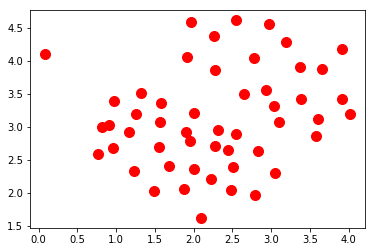

In [17]:
pyplot.plot(X[:,0],X[:,1],"ro",ms=10);

In this dataset, the positions of the positive examples (indicated with x) and the negative examples (indicated with o) suggest a natural separation indicated by the gap. However, notice that there is an outlier positive example x on the far left at about (0.1, 4.1). As part of this exercise, you will also see how this outlier affects the SVM decision boundary.

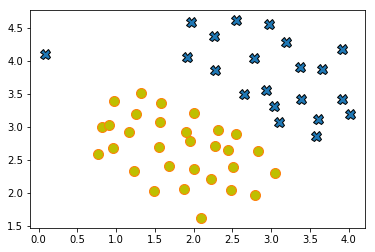

In [23]:
pyplot.plot(X[y==1,0],X[y==1,1], 'X', ms=10, mec='k', mew=1)
pyplot.plot(X[y==0,0],X[y==0,1],'o',ms=10, mfc='y')

In [25]:
C=1
model=utils.svmTrain(X,y,C,utils.linearKernel, 1e-3,20)
model

{'X': array([[2.2753  , 3.8589  ],
        [3.5772  , 2.856   ],
        [3.1048  , 3.0709  ],
        [1.9182  , 4.0534  ],
        [2.6555  , 3.5008  ],
        [3.0357  , 3.3165  ],
        [1.5841  , 3.3575  ],
        [2.0103  , 3.2039  ],
        [2.3099  , 2.9584  ],
        [2.8283  , 2.6309  ],
        [1.3191  , 3.5109  ],
        [2.5403  , 2.8867  ],
        [0.086405, 4.1045  ]]),
 'y': array([ 1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1,  1]),
 'kernelFunction': <function utils.linearKernel(x1, x2)>,
 'b': -10.366607050963616,
 'args': (),
 'alphas': array([2.77555756e-17, 1.00000000e+00, 1.00000000e+00, 6.24191420e-01,
        1.00000000e+00, 9.12521408e-01, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 5.36712828e-01, 1.00000000e+00,
        1.00000000e+00]),
 'w': array([1.41049233, 2.16692968])}

In [41]:
w=model['w']
b=model['b']

xp=np.linspace(min(X[:,0]),max(X[:,0]),100)
xp
yp=-(w[0]*xp+b)/w[1]


In this part of the exercise, you will try using different values of the $C$ parameter with SVMs. Informally, the $C$ parameter is a positive value that controls the penalty for misclassified training examples. A large $C$ parameter tells the SVM to try to classify all the examples correctly. $C$ plays a role similar to $1/\lambda$, where $\lambda$ is the regularization parameter that we were using previously for logistic regression.

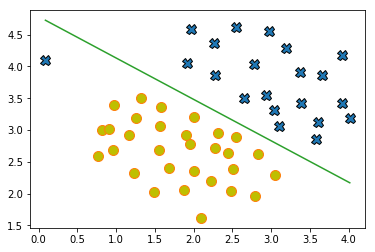

In [42]:
pyplot.plot(X[y==1,0],X[y==1,1], 'X', ms=10, mec='k', mew=1)
pyplot.plot(X[y==0,0],X[y==0,1],'o',ms=10, mfc='y');
pyplot.plot(xp,yp)

## 6.2 SVM with Gaussian Kernels

In this part of the exercise, you will be using SVMs to do non-linear classification. In particular, you will be using SVMs with Gaussian kernels on datasets that are not linearly separable.

### 6.2.1 Gaussian Kernel

To find non-linear decision boundaries with the SVM, we need to first implement a Gaussian kernel. You can think of the Gaussian kernel as a similarity function that measures the “distance” between a pair of examples,
($x^{(i)}$, $x^{(j)}$). The Gaussian kernel is also parameterized by a bandwidth parameter, $\sigma$, which determines how fast the similarity metric decreases (to 0) as the examples are further apart.
You should now complete the code in `gaussianKernel` to compute the Gaussian kernel between two examples, ($x^{(i)}$, $x^{(j)}$). The Gaussian kernel function is defined as:

$$ K_{\text{gaussian}} \left( x^{(i)}, x^{(j)} \right) = \exp \left( - \frac{\left\lvert\left\lvert x^{(i)} - x^{(j)}\right\lvert\right\lvert^2}{2\sigma^2} \right) = \exp \left( -\frac{\sum_{k=1}^n \left( x_k^{(i)} - x_k^{(j)}\right)^2}{2\sigma^2} \right)$$

In [ ]:
#     w, b = model['w'], model['b']
#     xp = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
#     yp = -(w[0] * xp + b)/w[1]

#     plotData(X, y)
#     pyplot.plot(xp, yp, '-b')

In [4]:
def gaussianKernel(x1, x2, sigma):
    """
    Computes the radial basis function
    Returns a radial basis function kernel between x1 and x2.
    """
    K=0
    K=np.exp(-(np.sum(np.square(x1-x2)))/(2*sigma**2))
    return K

In [5]:
x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2

sim = gaussianKernel(x1, x2, sigma)

print('Gaussian Kernel between x1 = [1, 2, 1], x2 = [0, 4, -1], sigma = %0.2f:'
      '\n\t%f\n(for sigma = 2, this value should be about 0.324652)\n' % (sigma, sim))

Gaussian Kernel between x1 = [1, 2, 1], x2 = [0, 4, -1], sigma = 2.00:
	0.324652
(for sigma = 2, this value should be about 0.324652)



### 6.2.2 Example Dataset 2


In [22]:
data=loadmat(os.path.join("Data","ex6data2.mat"))
data
X=data['X']
y=data['y'][:, 0]

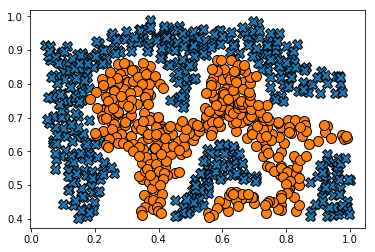

In [28]:
pyplot.plot(X[y==1,0],X[y==1,1],'X', ms=10, mec='k', mew=1)
pyplot.plot(X[y==0,0],X[y==0,1],'o', ms=10, mec='k', mew=1);

From the figure, you can obserse that there is no linear decision boundary that separates the positive and negative examples for this dataset. However, by using the Gaussian kernel with the SVM, you will be able to learn a non-linear decision boundary that can perform reasonably well for the dataset. If you have correctly implemented the Gaussian kernel function, the following cell will proceed to train the SVM with the Gaussian kernel on this dataset.

In [29]:
C=1
sigma=0.1
model=utils.svmTrain(X,y,C,gaussianKernel,args=(sigma,))

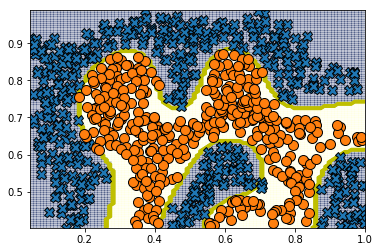

In [58]:
w=model['w']
b=model['b']
x1plot=np.linspace(min(X[:,0]),max(X[:,0]),100)
x2plot=np.linspace(min(X[:,1]),max(X[:,1]),100)
X1, X2 = np.meshgrid(x1plot, x2plot)
x1plot
vals = np.zeros(X1.shape)
for i in range(X1.shape[1]):
    this_X = np.stack((X1[:, i], X2[:, i]), axis=1)
    vals[:, i] = utils.svmPredict(model, this_X)
pyplot.contour(X1,X2,vals,colors='y',linewidths=2)
pyplot.pcolormesh(X1,X2,vals,cmap='YlGnBu',alpha=0.25,edgecolors='None',lw=0)
pyplot.plot(X[y==1,0],X[y==1,1],'X', ms=10, mec='k', mew=1)
pyplot.plot(X[y==0,0],X[y==0,1],'o', ms=10, mec='k', mew=1);
pyplot.grid(False)

In [57]:
a1=[1,2,4]
a2=[0,1,2]
a11,a22=np.meshgrid(a1,a2)
a22

array([[0, 0, 0],
       [1, 1, 1],
       [2, 2, 2]])

### 6.2.3 Example Dataset 3

In [61]:
data=loadmat(os.path.join("Data","ex6data3.mat"))
X,y,Xval,yval=data['X'],data['y'][:,0],data['Xval'],data['yval'][:,0]

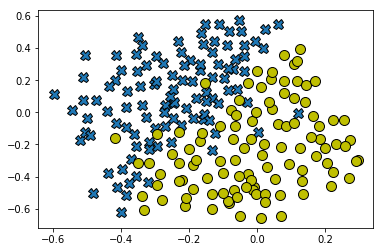

In [68]:
pyplot.plot(X[y==1,0],X[y==1,1],'X', mew=1,mec='k',ms=10 )
pyplot.plot(X[y==0,0],X[y==0,1],'o', mew=1,mec='k',ms=10,mfc='y' )

Task is to use the cross validation set Xval, yval to determine the best  𝐶  and  𝜎  parameter to use.  For both  𝐶  and  𝜎 , I should try values in multiplicative steps (e.g., 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30).

In [79]:
def dataset3Params(X, y, Xval, yval):
        """
    Returns your choice of C and sigma for Part 3 of the exercise 
    where you select the optimal (C, sigma) learning parameters to use for SVM
    with RBF kernel.
    """
    C = [0.01,0.03,0.1,0.3,1,3,10,30]
    sigma = [0.01,0.03,0.1,0.3,1,3,10,30]
    results=[]
    i=0
    result=[0,0,100]
    for c in C:
        for s in sigma:
            model=utils.svmTrain(X,y,c,gaussianKernel,args=(s,))
            predictions = utils.svmPredict(model, Xval)
            acc=np.mean(predictions!=yval)
            print (i)
            results.append("C: "+str(c)+ "sigma:" +str(s)+ "error:" +str(acc) )
            if acc<result[2]:
                result[0],result[1],result[2]=c,s,acc
            
            
            i+=1
    return result

In [80]:
dataset3Params(X,y,Xval,yval)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63


[0.3, 0.1, 0.035]

The provided code in the next cell trains the SVM classifier using the training set  (𝑋,𝑦)  using parameters loaded from dataset3Params

0.3 0.1


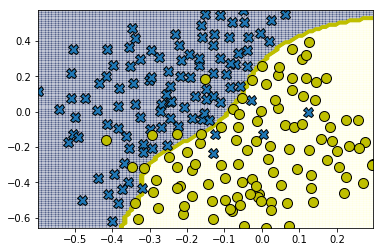

In [82]:
C,sigma,error=[0.3, 0.1, 0.035]
model = utils.svmTrain(X, y, C, gaussianKernel, args=(sigma,))
utils.visualizeBoundary(X, y, model)
print(C, sigma)

## 6.3.Spam Classification
Many email services today provide spam filters that are able to classify emails into spam and non-spam email with high accuracy. In this part of the exercise, you will use SVMs to build your own spam filter.

You will be training a classifier to classify whether a given email, $x$, is spam ($y = 1$) or non-spam ($y = 0$). 

In [87]:
#spam
with open(os.path.join('Data', 'emailSample1.txt')) as fid:
    file_contents = fid.read()
file_contents

"> Anyone knows how much it costs to host a web portal ?\n>\nWell, it depends on how many visitors you're expecting.\nThis can be anywhere from less than 10 bucks a month to a couple of $100. \nYou should checkout http://www.rackspace.com/ or perhaps Amazon EC2 \nif youre running something big..\n\nTo unsubscribe yourself from this mailing list, send an email to:\ngroupname-unsubscribe@egroups.com\n\n"

### 6.3.1. Preprocessing Emails
- **Lower-casing**: The entire email is converted into lower case, so that captialization is ignored (e.g., IndIcaTE is treated the same as Indicate).

- **Stripping HTML**: All HTML tags are removed from the emails. Many emails often come with HTML formatting; we remove all the HTML tags, so that only the content remains.

- **Normalizing URLs**: All URLs are replaced with the text “httpaddr”.

- **Normalizing Email Addresses**:  All email addresses are replaced with the text “emailaddr”.

- **Normalizing Numbers**: All numbers are replaced with the text “number”.

- **Normalizing Dollars**: All dollar signs ($) are replaced with the text “dollar”.

In [116]:
def processEmail(file_contents, verbose=True):
       """
    Preprocesses the body of an email and returns a list of indices 
    of the words contained in the email. """
    # Load Vocabulary
    vocabList = utils.getVocabList()

    # Init return value
    word_indices = []
    
    #verbose=True
    a=file_contents
    print(a)
    a=a.lower()
    a=re.compile("<[^<>]+>").sub(' ',a)
    a=re.compile('[0-9]+').sub('number',a)
    
    a=re.compile('(http|https)://[^\s]*').sub(' httpaddr',a)
    a=re.compile("[^\s]+@[^\s]+").sub(' emailaddr',a)
    a=re.compile('[$]+').sub(' dollar ',a)
    a = re.split('[ @$/#.-:&*+=\[\]?!(){},''">_<;%\n\r]', a)

    a=[word for word in a if len(word)>0]
    stemmer=utils.PorterStemmer()
    processed_email=[]
    for word in a:
        word=re.compile('[^a-zA-Z0-9]').sub('', word).strip()
        word = stemmer.stem(word)
        processed_email.append(word)
        
        if len(word)<1:
            continue

        try: 
             word_indices.append(vocabList.index(word))
        except ValueError:
            pass
    if verbose:
        print('----------------')
        print('Processed email:')
        print('----------------')
        print(' '.join(processed_email))
    return word_indices

    

In [117]:

word_indices  = processEmail(file_contents)

#Print Stats
print('-------------')
print('Word Indices:')
print('-------------')
print(word_indices)

> Anyone knows how much it costs to host a web portal ?
>
Well, it depends on how many visitors you're expecting.
This can be anywhere from less than 10 bucks a month to a couple of $100. 
You should checkout http://www.rackspace.com/ or perhaps Amazon EC2 
if youre running something big..

To unsubscribe yourself from this mailing list, send an email to:
groupname-unsubscribe@egroups.com


----------------
Processed email:
----------------
anyon know how much it cost to host a web portal well it depend on how mani visitor your expect thi can be anywher from less than number buck a month to a coupl of dollar number you should checkout httpaddr or perhap amazon ecnumb if your run someth big to unsubscrib yourself from thi mail list send an email to emailaddr
-------------
Word Indices:
-------------
[85, 915, 793, 1076, 882, 369, 1698, 789, 1821, 1830, 882, 430, 1170, 793, 1001, 1894, 591, 1675, 237, 161, 88, 687, 944, 1662, 1119, 1061, 1698, 374, 1161, 476, 1119, 1892, 1509, 798, 1181,

### 6.3.2. Extracting Features from Emails
I will now implement the feature extraction that converts each email into a vector in $\mathbb{R}^n$. I will be using n = # words in vocabulary list. Specifically, the feature $x_i \in \{0, 1\}$ for an email corresponds to whether the $i^{th}$ word in the dictionary occurs in the email. That is, $x_i = 1$ if the $i^{th}$ word is in the email and $x_i = 0$ if the $i^{th}$ word is not present in the email.

Thus, for a typical email, this feature would look like:

$$ x = \begin{bmatrix} 
0 & \dots & 1 & 0 & \dots & 1 & 0 & \dots & 0 
\end{bmatrix}^T \in \mathbb{R}^n
$$

In [119]:
def emailFeatures(word_indices):
    """
    Takes in a word_indices vector and produces a feature vector from the word indices. 
    """
    n=1899
    x=np.zeros(n)
    x[word_indices]=1
    return x

In [120]:
emailFeatures(word_indices)

array([0., 0., 0., ..., 0., 0., 0.])

In [122]:
with open(os.path.join("Data","emailSample1.txt")) as fid:
    file_contents=fid.read()
word_indices=processEmail(file_contents)
features=emailFeatures(word_indices)

# Print Stats
print('\nLength of feature vector: %d' % len(features))
print('Number of non-zero entries: %d' % sum(features > 0))

> Anyone knows how much it costs to host a web portal ?
>
Well, it depends on how many visitors you're expecting.
This can be anywhere from less than 10 bucks a month to a couple of $100. 
You should checkout http://www.rackspace.com/ or perhaps Amazon EC2 
if youre running something big..

To unsubscribe yourself from this mailing list, send an email to:
groupname-unsubscribe@egroups.com


----------------
Processed email:
----------------
anyon know how much it cost to host a web portal well it depend on how mani visitor your expect thi can be anywher from less than number buck a month to a coupl of dollar number you should checkout httpaddr or perhap amazon ecnumb if your run someth big to unsubscrib yourself from thi mail list send an email to emailaddr

Length of feature vector: 1899
Number of non-zero entries: 44


### 6.3.3 Training SVM for Spam Classification
In the following section we will load a preprocessed training dataset that will be used to train a SVM classifier. The file `spamTrain.mat` (within the `Data` folder for this exercise) contains 4000 training examples of spam and non-spam email, while `spamTest.mat` contains 1000 test examples. Each
original email was processed using the `processEmail` and `emailFeatures` functions and converted into a vector $x^{(i)} \in \mathbb{R}^{1899}$.

In [123]:
data = loadmat(os.path.join('Data', 'spamTrain.mat'))
X, y= data['X'].astype(float), data['y'][:, 0]

In [126]:
y.shape

(4000,)

In [128]:
print('Training Linear SVM (Spam Classification)')
print('This may take 1 to 2 minutes ...\n')

C = 0.1
model = utils.svmTrain(X, y, C, utils.linearKernel)

Training Linear SVM (Spam Classification)
This may take 1 to 2 minutes ...



In [129]:
p = utils.svmPredict(model, X)

print('Training Accuracy: %.2f' % (np.mean(p == y) * 100))

Training Accuracy: 99.83


In [130]:
data = loadmat(os.path.join('Data', 'spamTest.mat'))
Xtest, ytest = data['Xtest'].astype(float), data['ytest'][:, 0]

print('Evaluating the trained Linear SVM on a test set ...')
p = utils.svmPredict(model, Xtest)

print('Test Accuracy: %.2f' % (np.mean(p == ytest) * 100))

Evaluating the trained Linear SVM on a test set ...
Test Accuracy: 98.80


### 6.3.4. Top Predictors for Spam
To better understand how the spam classifier works, we can inspect the parameters to see which words the classifier thinks are the most predictive of spam. The next cell finds the parameters with the largest positive values in the classifier and displays the corresponding words similar to the ones shown in the figure below.


In [131]:
idx = np.argsort(model['w'])

In [132]:
idx

array([1560, 1665, 1764, ..., 1397,  297, 1190], dtype=int64)

In [134]:
top_idx = idx[-15:][::-1]
top_idx


array([1190,  297, 1397,  738, 1795,  155,  476, 1851, 1298, 1263, 1088,
       1066,  965,  698,  390], dtype=int64)

In [136]:

vocabList = utils.getVocabList()
vocabList

['aa',
 'ab',
 'abil',
 'abl',
 'about',
 'abov',
 'absolut',
 'abus',
 'ac',
 'accept',
 'access',
 'accord',
 'account',
 'achiev',
 'acquir',
 'across',
 'act',
 'action',
 'activ',
 'actual',
 'ad',
 'adam',
 'add',
 'addit',
 'address',
 'administr',
 'adult',
 'advanc',
 'advantag',
 'advertis',
 'advic',
 'advis',
 'ae',
 'af',
 'affect',
 'affili',
 'afford',
 'africa',
 'after',
 'ag',
 'again',
 'against',
 'agenc',
 'agent',
 'ago',
 'agre',
 'agreement',
 'aid',
 'air',
 'al',
 'alb',
 'align',
 'all',
 'allow',
 'almost',
 'alon',
 'along',
 'alreadi',
 'alsa',
 'also',
 'altern',
 'although',
 'alwai',
 'am',
 'amaz',
 'america',
 'american',
 'among',
 'amount',
 'amp',
 'an',
 'analysi',
 'analyst',
 'and',
 'ani',
 'anim',
 'announc',
 'annual',
 'annuiti',
 'anoth',
 'answer',
 'anti',
 'anumb',
 'anybodi',
 'anymor',
 'anyon',
 'anyth',
 'anywai',
 'anywher',
 'aol',
 'ap',
 'apolog',
 'app',
 'appar',
 'appear',
 'appl',
 'appli',
 'applic',
 'appreci',
 'approach',

In [137]:
print('Top predictors of spam:')
print('%-15s %-15s' % ('word', 'weight'))
print('----' + ' '*12 + '------')
for word, w in zip(np.array(vocabList)[top_idx], model['w'][top_idx]):
    print('%-15s %0.2f' % (word, w))

Top predictors of spam:
word            weight         
----            ------
our             0.50
click           0.47
remov           0.42
guarante        0.39
visit           0.37
basenumb        0.35
dollar          0.33
will            0.27
price           0.26
pleas           0.26
nbsp            0.26
most            0.25
lo              0.25
ga              0.25
da              0.24


In [141]:
filename = os.path.join('Data', 'spamSample1.txt')

with open(filename) as fid:
    file_contents = fid.read()

    
word_indices = processEmail(file_contents, verbose=False)
x = emailFeatures(word_indices)
p = utils.svmPredict(model, x)

print('\nProcessed %s\nSpam Classification: %s' % (filename, 'spam' if p else 'not spam'))

Do You Want To Make $1000 Or More Per Week?

 

If you are a motivated and qualified individual - I 
will personally demonstrate to you a system that will 
make you $1,000 per week or more! This is NOT mlm.

 

Call our 24 hour pre-recorded number to get the 
details.  

 

000-456-789

 

I need people who want to make serious money.  Make 
the call and get the facts. 

Invest 2 minutes in yourself now!

 

000-456-789

 

Looking forward to your call and I will introduce you 
to people like yourself who
are currently making $10,000 plus per week!

 

000-456-789



3484lJGv6-241lEaN9080lRmS6-271WxHo7524qiyT5-438rjUv5615hQcf0-662eiDB9057dMtVl72



Processed Data\spamSample1.txt
Spam Classification: spam
